In [13]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt


In [52]:


new_dir = '/Users/juanbello/Desktop/Kaggle'

sys.path.append(os.path.join(new_dir))

# Load the datasets
df_ed = pd.read_csv('education.csv') # education
df_hh = pd.read_csv('household.csv') # education

df_pov = pd.read_csv('poverty.csv') # poverty/answers


In [54]:
### Prepare Ed data
def prepare_df(df, suffix:str):
    uids = df['psu'].astype(str) + "_"  + df['hh'].astype(str) + "_" + df['idcode'].astype(str) 
    df =  df.drop(columns=['psu', 'hh', 'idcode'])
    df.columns = [suffix + "_" + col.capitalize() for col in df.columns]
    df.insert(0, 'uid', uids)
    return df
    
df_ed = prepare_df(df_ed, 'ED')
df_hh = prepare_df(df_hh, 'HH')

# Transform on poverty data from distribution to score for intuition

In [56]:
### ONLY RUN ONCE
for i in range(1,11):
    col = 'subjective_poverty_'+ str(i)
    df_pov.loc[df_pov[col]==1, 'poverty_score'] = i

df_pov['uid'] = df_pov['psu_hh_idcode']
df_pov_scores = df_pov[['uid', 'poverty_score']]


In [66]:
df_hh

,uid,HH_Hhid,HH_Q02,HH_Q03,HH_Q04,HH_Q05y,HH_Q05m,HH_Q06,HH_Q07,HH_Q08,...,HH_Q13,HH_Q14,HH_Q15,HH_Q16,HH_Q17,HH_Q18,HH_Q19,HH_Q20,HH_Q21,HH_Q22
0,1_2_1,102,1,1,19600711,52,1,1.0,1.0,2.0,...,3.0,2.0,80.0,NaN,2,NaN,3.0,2.0,80.0,NaN
1,1_2_2,102,2,2,19650225,47,6,1.0,1.0,1.0,...,3.0,2.0,67.0,NaN,2,NaN,3.0,2.0,74.0,NaN
2,1_3_1,103,1,1,19540203,58,7,1.0,1.0,2.0,...,2.0,2.0,85.0,NaN,2,NaN,2.0,2.0,67.0,NaN
3,1_3_2,103,2,2,19560602,56,3,1.0,1.0,1.0,...,2.0,2.0,67.0,NaN,2,NaN,2.0,2.0,67.0,NaN
4,1_3_3,103,1,4,19850825,27,0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,834_8_4,83408,2,4,19900316,22,5,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN
23997,834_8_5,83408,1,4,19890511,23,3,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN
23998,834_9_1,83409,1,1,19640314,48,5,1.0,1.0,2.0,...,1.0,2.0,78.0,NaN,2,NaN,2.0,2.0,84.0,NaN
23999,834_9_2,83409,2,2,19710425,41,4,1.0,1.0,1.0,...,1.0,2.0,70.0,NaN,2,NaN,1.0,2.0,83.0,NaN


# WE can only use training data for which we have an answer (in terms of poverty score), so let's do that!


In [68]:
df_ed = df_ed[df_ed['uid'].isin(df_pov_scores['uid'])]
df_ed = df_ed.merge(df_pov_scores[['uid', 'poverty_score']], on='uid', how='left')


df_hh = df_hh[df_hh['uid'].isin(df_pov_scores['uid'])]
df_hh = df_hh.merge(df_pov_scores[['uid', 'poverty_score']], on='uid', how='left')

#df_ed, and df_hh are now ready!

In [84]:
# quite a lot of data wasted... nothing we can do.... right?
print(df_hh.shape)
print(df_ed.shape)
print(df_pov_scores.shape)

(5334, 25)
(5334, 68)
(5337, 2)


In [93]:
# df_hh.to_csv('hh_train_transform.csv', index=False)
# df_ed.to_csv('ed_train_transform.csv', index=False)
# df_pov_scores.to_csv('scores_train_transform.csv', index=False)


# !!!!!!!!!!!!!!!!
# Looks like we may be able to use household data and household ids to make generalizations... and use more data 
# !!!!!!!!!!!!!!!!

Maybe a predictor based directly on the household id?...

In [115]:
df_ed = pd.read_csv('education.csv') # education
df_hh = pd.read_csv('household.csv') # education
df_pov_scores['hh'] = df_pov_scores['uid'].apply(lambda uid : int(uid.split('_')[1]) )
# df_ed

/var/folders/21/wpdrdb153rgcw7h7qz_vrd_40000gn/T/ipykernel_48706/2629083096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pov_scores['hh'] = df_pov_scores['uid'].apply(lambda uid : int(uid.split('_')[1]) )


In [113]:
"30_8_1".split('_')[1]

'8'

In [123]:
df_ed[df_ed['hh']==10] # why are there some idcodes equal to each other!????/

,psu,hh,idcode,q01,q02,q03,q04,q05,q06,q07,...,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66
78,284,10,4,1,1,1,6.0,1.0,3.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0
81,301,10,4,1,1,1,5.0,3.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,3.0
107,380,10,4,1,1,1,6.0,1.0,3.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,200000.0,5.0
110,384,10,4,1,1,1,2.0,3.0,3.0,0.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,5.0
122,400,10,3,1,1,1,6.0,1.0,3.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22306,589,10,3,1,1,1,6.0,4.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22314,832,10,9,1,1,1,6.0,4.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22348,266,10,2,1,1,1,8.0,2.0,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22395,49,10,4,1,1,1,2.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
hh10 = df_pov_scores[df_pov_scores['hh']==10]
hh10['poverty_score'].describe()

count    199.000000
mean       4.618090
std        1.937111
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: poverty_score, dtype: float64

(array([29., 63., 70., 35.,  2.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ]),
 <BarContainer object of 5 artists>)

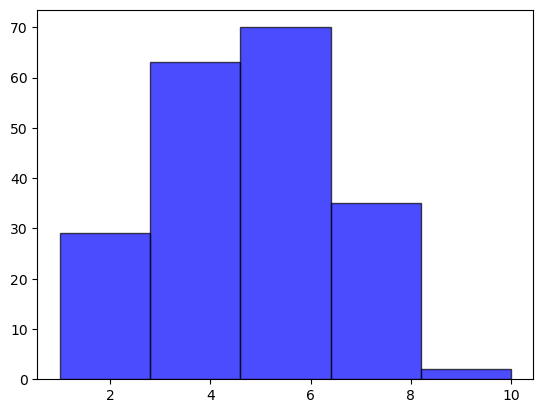

In [135]:
plt.hist(hh10['poverty_score'], bins=5, color='blue', edgecolor='black', alpha=0.7)